# K Means Clustering Algorithm 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import numpy as np
from scipy import io

#### Loading Data

In [123]:
data = pd.read_csv('Mall_Customers.csv')
x = data.iloc[:, [-2, -1]].values
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Before Clustering

Text(0, 0.5, 'Spending Score(1-100)')

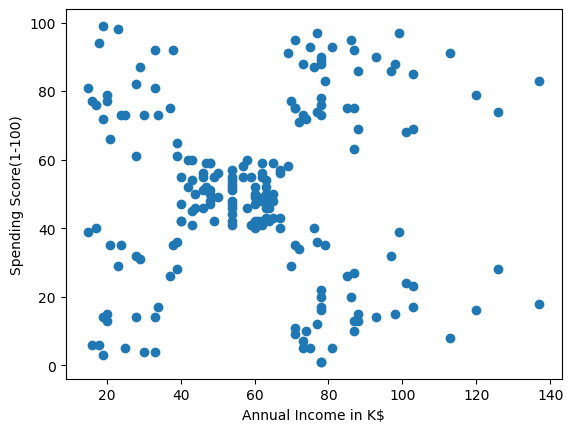

In [125]:
plt.scatter(x[:, 0], x[:, -1])
plt.xlabel('Annual Income in K$')
plt.ylabel('Spending Score(1-100)')

In [116]:
class KMeans:
    def __init__(self, clusters=None, cluster_centroids=None, maxiters=150):
        self.asdclstrs = []
        self.cluster_centroids = None
        self.clusters = None
        if cluster_centroids:
            self.cluster_centroids = cluster_centroids
            self.clusters = self.cluster_centroids.shape[0]
        else:
            self.clusters = clusters
        self.maxiters = maxiters
        self.xcopy = None
        
    def fit(self, x):
        self.xcopy = x.copy()
        rd_indc = sample(range(0, self.xcopy.shape[0]), self.clusters)
        self.cluster_centroids = np.array([self.xcopy[i] for i in rd_indc])
        self.compute_centroid(x, self.cluster_centroids)
        
    def assign_cluster(self, x, cluster_centroids):
        self.asdclstrs.clear()
        for i in range(x.shape[0]):
            dist = x[i] - cluster_centroids
            dist = list(np.sum(np.square(dist), axis=1))
            self.asdclstrs.append(dist.index(min(dist)))
    
    def compute_centroid(self, x, cluster_centroids):
        subx = []
        for i in range(self.maxiters):
            self.assign_cluster(self.xcopy, self.cluster_centroids)
            for x in np.unique(self.asdclstrs):
                subx.append(np.array([self.xcopy[i] for i in range(len(self.asdclstrs)) if x==self.asdclstrs[i]]))
            self.cluster_centroids = np.array([np.mean(np.array(x), axis=0) for x in subx])
            subx.clear()

#### Preparing Model 

In [117]:
km = KMeans(clusters=5, maxiters=900)

In [118]:
km.fit(x)

#### Cluster Centroids

In [119]:
km.cluster_centroids

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

#### After Clustering

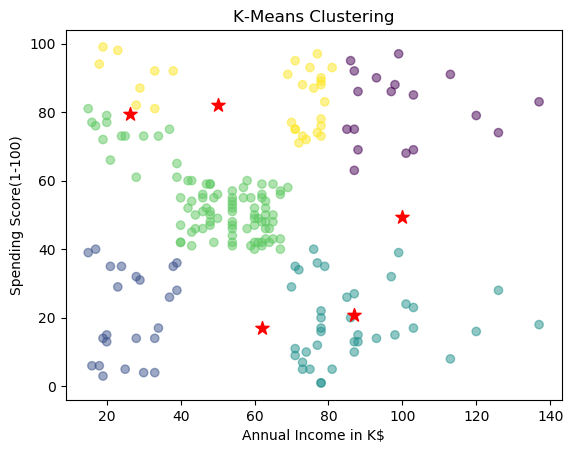

In [124]:
a = np.mean(x, axis=0)
plt.xlabel('Annual Income in K$')
plt.ylabel('Spending Score(1-100)')
plt.title('K-Means Clustering')
plt.scatter(x[:, 0], x[:, 1], c=knn.asdclstrs, alpha=0.5)
plt.scatter(knn.cluster_centroids[0, 0], km.cluster_centroids[0, 1], c='r', marker='*', s=100)
plt.scatter(knn.cluster_centroids[1, 0], km.cluster_centroids[1, 1], c='r', marker='*', s=100)
plt.scatter(knn.cluster_centroids[2, 0], km.cluster_centroids[2, 1], c='r', marker='*', s=100)
plt.scatter(knn.cluster_centroids[3, 0], km.cluster_centroids[3, 1], c='r', marker='*', s=100)
plt.scatter(knn.cluster_centroids[4, 0], km.cluster_centroids[4, 1], c='r', marker='*', s=100)